In this notebook we combine all the running time measurements computed for the different algorithms and generate plots

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import squidpy as sq
import scanpy as sc
import os
import seaborn as sns
import matplotlib

In [20]:
path='../../figures/times_svf'
files=os.listdir(path)
allgen=[]
for f in files:
    expe=pd.read_csv(path+'/'+f)
#    print(expe)
    expe.index=expe['cells']
    allgen.append(expe)

In [21]:
allg=pd.concat(allgen,axis=1)
algood=allg.loc[:,['time_giotto_kmeans','time_giotto_rank','time_seurat_i','time_seurat_markvariogram','times_HOTSPOT','times_somde', 'times_sinfonia',  'times_spatialDE', 'times_hvg', 'times_I', 'times_G']]

In [24]:
algood.loc[[10000.0,50000.0],['time_giotto_kmeans','time_giotto_rank']]=algood.loc[[10000.0,50000.0],['time_giotto_kmeans','time_giotto_rank']]*60
algood=algood/60

<Figure size 1000x1000 with 0 Axes>

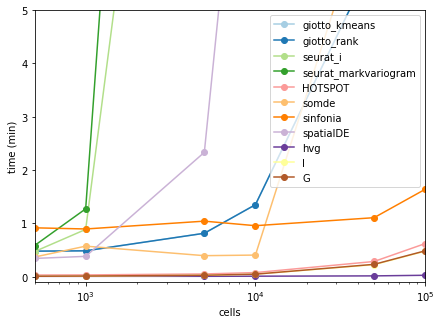

In [106]:
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.figure(figsize=(5,5),dpi=200)
algood.plot(figsize=(7,5),cmap='Paired',marker='o')
plt.xscale('log')
#plt.yscale('log')
plt.xlim(500,100000)
plt.ylim(-0.1,5)
plt.ylabel('time (min)')
plt.savefig('../../figures/7.spatial_architecture/time_for_each_method.pdf')

In [107]:
algood.columns=[c.replace('time_','').replace('times_','') for c in algood.columns]

<Figure size 600x1000 with 0 Axes>

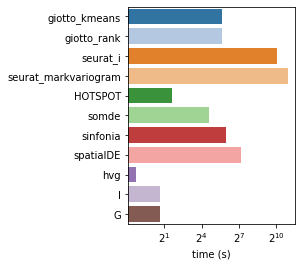

In [110]:
import seaborn as sns
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.figure(figsize=(3,5),dpi=200)
fig,ax=plt.subplots(figsize=(3,4))
sns.barplot(y=algood.columns,x=algood.loc[5000,:]*60,palette='tab20')
#plt.xscale('log')
plt.xlabel('time (s)')
ax.set_xscale('log', base=2)
plt.savefig('../../figures/7.spatial_architecture/time_5000.pdf')

### From here we try to model the behaviour of each algorithm (not included in the manuscript)

In [76]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define a function that represents the model you want to fit
def your_function(x, a, b, c):
    return a * x**2 + b * x + c
# Define a function to calculate the sum of squared residuals
def sum_of_squared_residuals(params, x, y):
    return np.sum((y - your_function(x, *params))**2)

giotto_kmeans
168.73016861947337


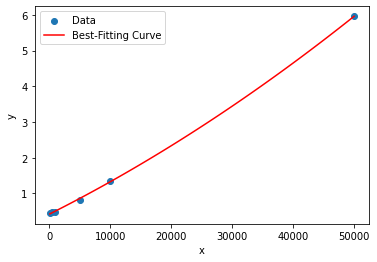

giotto_rank
168.73016861947337


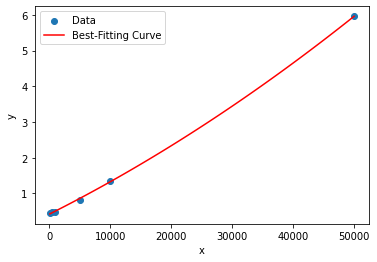

seurat_i
190337.6922767364


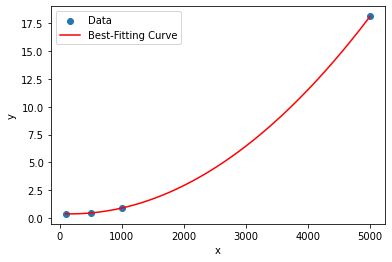

seurat_markvariogram
344613.91181305493


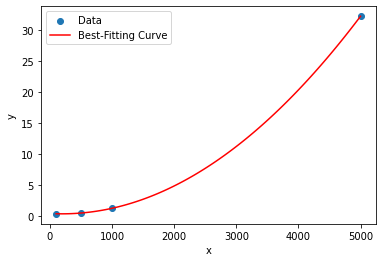

HOTSPOT
6.12393899291245


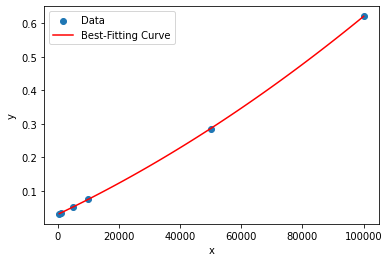

somde
18.248504605037144


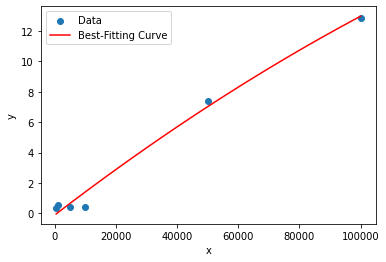

sinfonia
17.92207615880914


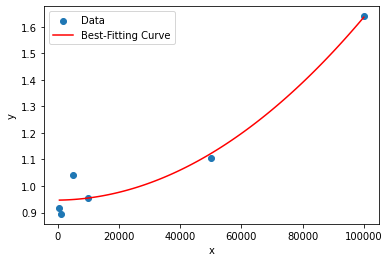

spatialDE
38244.46161891452


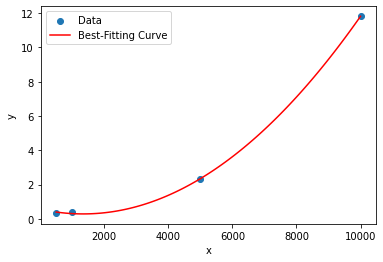

hvg
0.2047058304545715


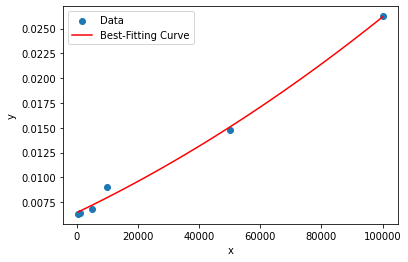

I
3.8200717821639563


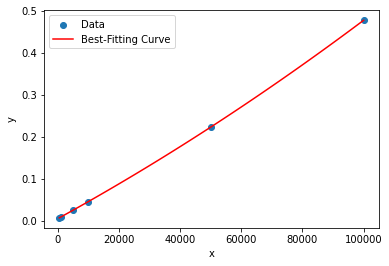

G
3.573884202746213


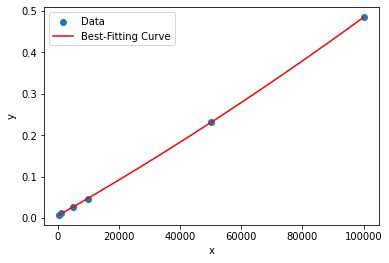

In [91]:
xfit2=[150000]
expected_times=[]
allpars=[]
for c in algood.columns:
    print(c)
    x=algood.index[~algood.loc[:,c].isna()]
    y = algood.loc[x,c]
    # Use scipy.optimize to find the best-fitting parameters
    initial_guess = (1, 1, 1)  # Initial parameter guess
    best_fit_params, _ = curve_fit(your_function, x, y, p0=initial_guess)
    params=pd.DataFrame(best_fit_params,columns=[c],index=['a','b','c'])
    allpars.append(params)
    # Create a set of x-values for plotting
    x_fit = np.linspace(min(x), max(x), 100)
    y_fit = your_function(x_fit, *best_fit_params)
    x_fit2=np.array([500000.0])
    y_fit2 = your_function(x_fit2, *best_fit_params)
    print(y_fit2[0])
    expected_times.append(y_fit2[0])
    # Visualize the data and best-fitting curve
    plt.scatter(x, y, label='Data')
    plt.plot(x_fit, y_fit, 'r', label='Best-Fitting Curve')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()


In [92]:
allgs=pd.concat(allpars,axis=1)
predicted_times=pd.DataFrame(np.round(expected_times,1),index=algood.columns,columns=['times_for_150k'])

## 